In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
input = {
    'season' : '2018'
    ,'tophalfweight' : .76
}
pd.options.display.max_rows = 200

In [2]:
df = pd.read_csv('data/'+input['season']+'_00_matchup_recap.txt', header=0)

scores = df.loc[df['SEASON']==int(input['season'])][['TEAMNAME','SCORINGPERIOD','SCORE','OUTCOME']]

scores['ACTUAL'] = scores.apply(lambda row: row.OUTCOME == 'W', axis=1)
scores['EXPECTED'] = scores['SCORE'].to_frame().apply(st.zscore, ddof=1).apply(st.norm.cdf)
scores['EXPECTED_TOPHALF'] = scores.apply(lambda row: row.EXPECTED > .5 , axis=1)  # top half of season long scores.  needs to be by week 
#AVG overwieghts the TOPHALF
scores['EXPECTED_WEIGHTED'] = (scores['EXPECTED']*(1-input['tophalfweight']))+(scores['EXPECTED_TOPHALF']*input['tophalfweight'])

exp_wins = scores.groupby('TEAMNAME').sum()[['ACTUAL','EXPECTED','EXPECTED_TOPHALF','EXPECTED_WEIGHTED']]
#exp_wins = scores.groupby('TEAMNAME').sum()[['ACTUAL','EXPECTED','EXPECTED_TOPHALF']]
exp_wins['LUCK_EXPECTED']=exp_wins['ACTUAL']-exp_wins['EXPECTED']
exp_wins['LUCK_TOPHALF']=exp_wins['ACTUAL']-exp_wins['EXPECTED_TOPHALF']
exp_wins['LUCK_WEIGHTED']=exp_wins['ACTUAL']-exp_wins['EXPECTED_WEIGHTED']



In [3]:
exp_wins[['ACTUAL','EXPECTED','LUCK_EXPECTED','LUCK_TOPHALF','LUCK_WEIGHTED']].sort_values('LUCK_WEIGHTED')

,ACTUAL,EXPECTED,LUCK_EXPECTED,LUCK_TOPHALF,LUCK_WEIGHTED
TEAMNAME,,,,,
JMT,1.0,2.367364,-1.367364,-1.0,-1.088167
Tony,4.0,4.736025,-0.736025,-1.0,-0.936646
JJ,2.0,2.495757,-0.495757,-1.0,-0.878982
Paul,6.0,5.964209,0.035791,-1.0,-0.751410
Jeremy,5.0,5.692815,-0.692815,0.0,-0.166276
Goss,2.0,2.571082,-0.571082,0.0,-0.137060
Tim,4.0,4.470573,-0.470573,0.0,-0.112937
Brent,7.0,6.312537,0.687463,0.0,0.164991
Thomas,7.0,6.297583,0.702417,0.0,0.168580


In [4]:
scores[scores['SCORINGPERIOD']==scores['SCORINGPERIOD'].max()][['TEAMNAME','SCORE','OUTCOME','EXPECTED','EXPECTED_TOPHALF','EXPECTED_WEIGHTED']].sort_values('EXPECTED_WEIGHTED', ascending=False)

,TEAMNAME,SCORE,OUTCOME,EXPECTED,EXPECTED_TOPHALF,EXPECTED_WEIGHTED
102,Thomas,156.3,W,0.902712,True,0.976651
99,Tony,143.5,W,0.756000,True,0.941440
101,Paul,132.2,W,0.563783,True,0.895308
97,Tim,127.6,W,0.477521,False,0.114605
104,Jeremy,125.3,W,0.434532,False,0.104288
98,Goss,116.5,L,0.281001,False,0.067440
96,Brent,114.5,L,0.250094,False,0.060023
107,Kyle,114.4,W,0.248598,False,0.059663
103,Schwartz,113.7,L,0.238257,False,0.057182
100,Scott,101.6,L,0.099820,False,0.023957


In [5]:
h2h = df.groupby(['TEAMNAME','OPPONENTNAME', 'OUTCOME'])['OUTCOME'].count().unstack().fillna(0)

In [6]:
scores.sort_values('EXPECTED', ascending=False)

,TEAMNAME,SCORINGPERIOD,SCORE,OUTCOME,ACTUAL,EXPECTED,EXPECTED_TOPHALF,EXPECTED_WEIGHTED
0,Jeremy,1,182.5,W,True,0.994342,True,0.998642
56,Brent,5,174.2,W,True,0.983877,True,0.996131
44,Tim,4,172.1,W,True,0.979440,True,0.995066
51,Paul,5,165.3,W,True,0.957431,True,0.989783
30,Tony,3,162.9,W,True,0.946129,True,0.987071
78,Thomas,7,161.2,W,True,0.936775,True,0.984826
70,Brent,6,160.3,W,True,0.931335,True,0.983520
89,Scott,8,159.1,W,True,0.923529,True,0.981647
95,Thomas,8,158.4,W,True,0.918673,True,0.980482
39,Schwartz,4,157.6,W,True,0.912843,True,0.979082


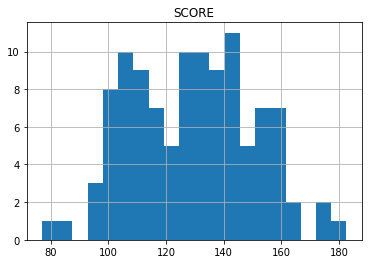

In [44]:
plt.close()
scores.hist(column=['SCORE'], bins=20)
plt.show()


In [10]:
df = pd.DataFrame({
     'length': [1.5, 0.5, 1.2, 0.9, 3],
     'width': [0.7, 0.2, 0.15, 0.2, 1.1]
     }, index= ['pig', 'rabbit', 'duck', 'chicken', 'horse'])
hist = df.hist(bins=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c1bd9b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1c1f4908>]], dtype=object)